In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Set data set directory strings to variables
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read dataset csv's into dataframe
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Begin data review
# Display mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Display study data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Merge data to attribute Drug Regimen to Tumor Volume
mergeData = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
mergeData
#mergeData.sort_values(["Mouse ID", "Timepoint"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Use .duplicated to retrieve Mouse IDs in rows where Mouse IDs and timepoints are a duplicate
mergeDataDupe = mergeData[mergeData.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]
# Get list of any Mouse ID that has been duplicated
dupeMice = mergeDataDupe["Mouse ID"].unique()

In [5]:
# Use for loop to regenerate database without each Mouse ID found to be a duplicate
# *All data on the mouse will be removed, as instructed by the assignment instructions "...check the data 
# for any mouse ID with duplicate time points and remove any data associated with that mouse ID."
for x in dupeMice:
    mergeDataClean = mergeData[mergeData["Mouse ID"] != x]

# Recheck for duplicates
mergeDataCleanChk = mergeDataClean[mergeDataClean.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]
print(mergeDataCleanChk)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [6]:
# Review final cleaned dataframe
print(mergeDataClean)
print(f'-------------------------')
print(mergeDataClean.dtypes)
print(f'-------------------------')
print(mergeDataClean.count())
print(f'-------------------------')

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [7]:
#Final Review
    # 1880 rows × 8 columns
    # No Null values
    # Data types OK
    # Values OK
    # No duplicate Mouse IDs with duplicate timepoints in mergeDataClean
# OK to proceed with calculations
# Use mergeDataClean as the dataset

In [8]:
# Generate a summary statistics table consisting of the following stats on the tumor 
# volume for each drug regimen

# Separate the Tumor Volume and Drug Regimen
tumorVoldf = mergeDataClean.loc[:,["Tumor Volume (mm3)","Drug Regimen"]]

# Group by the drug regimen
drugTumorGroups = tumorVoldf.groupby("Drug Regimen")
# Find mean
drugMeanSer = drugTumorGroups.mean()
# Find median
drugMedSer = drugTumorGroups.median()
# Find variance
drugVarSer = drugTumorGroups.var(ddof = 0)
# Find standard deviation
drugSTDSer = drugTumorGroups.std(ddof = 0)
# Find SEM
drugSEMSer = drugTumorGroups.sem(ddof=0)

# Assemble summary table
summaryStatsdf = pd.DataFrame({"Mean":drugMeanSer.iloc[:,0], 
                             "Median":drugMedSer.iloc[:,0],
                             "Variance":drugVarSer.iloc[:,0],
                             "St Dev":drugSTDSer.iloc[:,0],
                             "SEM":drugSEMSer.iloc[:,0]
                            })
# Format summary table
summaryStatsdf["Mean"] = summaryStatsdf["Mean"].map("{:,.3f}".format)
summaryStatsdf["Median"] = summaryStatsdf["Median"].map("{:,.3f}".format)
summaryStatsdf["Variance"] = summaryStatsdf["Variance"].map("{:,.3f}".format)
summaryStatsdf["St Dev"] = summaryStatsdf["St Dev"].map("{:,.3f}".format)
summaryStatsdf["SEM"] = summaryStatsdf["SEM"].map("{:,.3f}".format)
summaryStatsdf

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.839,4.984,0.329
Ceftamin,52.591,51.776,39.069,6.251,0.468
Infubinol,52.885,51.821,42.886,6.549,0.491
Ketapril,55.236,53.699,68.189,8.258,0.602
Naftisol,54.332,52.509,65.818,8.113,0.595
Placebo,54.034,52.289,60.830,7.799,0.580
Propriva,52.321,50.446,43.556,6.600,0.542
Ramicane,40.217,40.673,23.384,4.836,0.320
Stelasyn,54.233,52.432,59.122,7.689,0.572


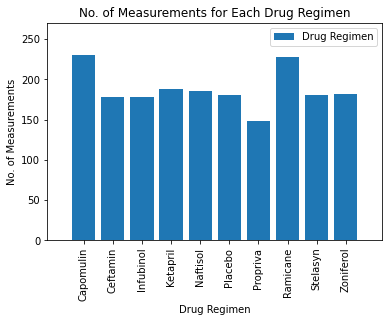

In [21]:
# Create and display bar plot for total number of measurements for each regimen as instructed by the
# homework instructions.

# DataFrame.plot() version

# Get count values
drugGroups = mergeDataClean.groupby("Drug Regimen")
countValues = drugGroups["Drug Regimen"].count()

# Plot bar chart
drugMeasureChart = countValues.plot(kind = "bar", width = 0.8, title = "No. of Measurements for Each Drug Regimen")

# Format chart
drugMeasureChart.set_ylabel("No. of Measurements")
plt.xticks(rotation = 90)
plt.xlim(-1.25, len(np.arange(len(drugGroups))) + .25)
plt.ylim(0, max(countValues) + 40)
plt.legend()
plt.show()

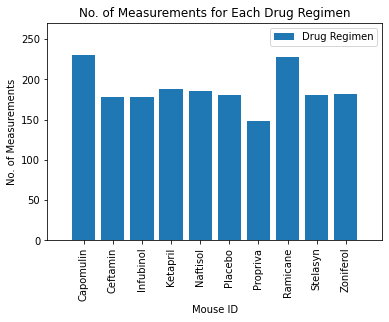

In [22]:
#pyplot version
# Get count values
xValues = countValues.index
yValues = countValues

# Plot bar chart
plt.bar(xValues, yValues, width=0.8)

# Format bar chart
plt.xticks(rotation = 90)
plt.title("No. of Measurements for Each Drug Regimen")
plt.xlabel("Mouse ID")
plt.ylabel("No. of Measurements")
plt.xlim(-1.25, len(np.arange(len(yValues.index))) + .25)
plt.ylim(0, max(yValues) + 40)
plt.legend([yValues.index.name], loc = "best")
plt.show()

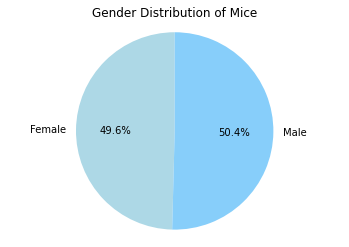

In [23]:
# Create and display pie plot for total number of mice per gender
# DataFrame.plot() version

# Get count values
genderGroups = mergeDataClean.groupby("Sex")
genderCountValues = genderGroups["Mouse ID"].nunique()
femaleCount = genderCountValues["Female"]
maleCount = genderCountValues["Male"]

# Plot pie chart
genderChart = genderCountValues.plot(kind = "pie", autopct = "%1.1f%%", shadow = False,startangle = 90, 
                                     title = "Gender Distribution of Mice", colors =["lightblue", "lightskyblue"])
# Format pie chart
plt.axis("equal")
plt.xlabel("")
plt.ylabel("")
plt.show()

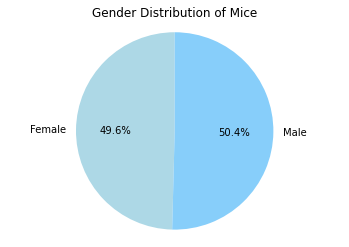

In [24]:
# Create and display pie plot for total number of mice per gender
# pyplot version
# Plot pie chart
# Create labels for pyplot input
labels = list(genderCountValues.index.values) 
#labels
plt.pie(genderCountValues, labels = labels, autopct="%1.1f%%", shadow=False,startangle=90, 
        colors =["lightblue", "lightskyblue"])
# Format pie chart
plt.title("Gender Distribution of Mice")
plt.xlabel("")
plt.ylabel("")
plt.axis("equal")
plt.show()

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential 
# outliers across all four treatment regimens.
topTreatmentsdf = mergeDataClean.loc[(mergeDataClean["Drug Regimen"] == "Capomulin") | 
                                      (mergeDataClean["Drug Regimen"] == "Ramicane") | 
                                      (mergeDataClean["Drug Regimen"] == "Infubinol") | 
                                      (mergeDataClean["Drug Regimen"] == "Ceftamin")
                                     ,:]
# Find the final timepoint for all mice
topTreatmentGroup = topTreatmentsdf.groupby("Mouse ID")
maxTime = topTreatmentGroup["Timepoint"].max()
# Attach the Tumor Volumes to the found Mice and Timepoints by inner joining on both series to "filter out"
# all other entries
finalTumordf = pd.merge(maxTime, mergeDataClean, on=["Mouse ID", "Timepoint"], how="inner")
# Rename tumor volume series to reflect intent of the data
finalTumordf = finalTumordf.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume"})

# Review merged dataframe
finalTumordf


,Mouse ID,Timepoint,Final Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [26]:
# Calculate quartiles and IQRs for all treatment regimens

# Capomulin
capdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Capomulin"),["Final Tumor Volume"]]
print(f'Capomulin')
print(f'--------------------------------')
capQrtl = capdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerCapQrtl = capQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerCapQrtl}')
upperCapQrtl = capQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperCapQrtl}')
iqrCapQrtl = upperCapQrtl - lowerCapQrtl
print(f'IQR: {"%.3f" % iqrCapQrtl}')
lowerBoundCapQrtl = lowerCapQrtl - (1.5 * iqrCapQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCapQrtl}')
upperBoundCapQrtl = upperCapQrtl + (1.5 * iqrCapQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundCapQrtl}')
outliersCapQrtl = capdf.loc[(capdf['Final Tumor Volume'] < lowerBoundCapQrtl) | (capdf['Final Tumor Volume'] > upperBoundCapQrtl)]
outliersCapQrtl
if outliersCapQrtl.empty:
    print(f'No outliers for Capomulin')
else:
    print(f'Outliers present for Capomulin')
    print(finalTumordf.loc[outliersCapQrtl.index,["Mouse ID", "Final Tumor Volume"]])
    print(outliersCapQrtl)
print()

# Ramicane 
ramdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Ramicane"),["Final Tumor Volume"]]
#ramQrtlSeries = ramSeries.quantile([.25,.5,.75])
print(f'Ramicane')
print(f'--------------------------------')
ramQrtl = ramdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerRamQrtl = ramQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerRamQrtl}')
upperRamQrtl = ramQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperRamQrtl}')
iqrRamQrtl = upperRamQrtl - lowerRamQrtl
print(f'IQR: {"%.3f" % iqrRamQrtl}')
lowerBoundRamQrtl = lowerRamQrtl - (1.5 * iqrRamQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCapQrtl}')
upperBoundRamQrtl = upperRamQrtl + (1.5 * iqrRamQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundRamQrtl}')
outliersRamQrtl = ramdf.loc[(ramdf['Final Tumor Volume'] < lowerBoundRamQrtl) | (ramdf['Final Tumor Volume'] > upperBoundRamQrtl)]
outliersRamQrtl
if outliersRamQrtl.empty:
    print(f'No outliers for Ramicane')
else:
    print(f'Outliers present for Ramicane')
    print(finalTumordf.loc[outliersRamQrtl.index,["Mouse ID", "Final Tumor Volume"]])
    print(outliersRamQrtl)
print()

# Infubinol
infdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Infubinol"),["Final Tumor Volume"]]
#infQrtlSeries = infSeries.quantile([.25,.5,.75])
print(f'Infubinol')
print(f'--------------------------------')
infQrtl = infdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerInfQrtl = infQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerInfQrtl}')
upperInfQrtl = infQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperInfQrtl}')
iqrInfQrtl = upperInfQrtl - lowerInfQrtl
print(f'IQR: {"%.3f" % iqrInfQrtl}')
lowerBoundInfQrtl = lowerInfQrtl - (1.5 * iqrInfQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCapQrtl}')
upperBoundInfQrtl = upperInfQrtl + (1.5 * iqrInfQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundInfQrtl}')
outliersInfQrtl = infdf.loc[(infdf['Final Tumor Volume'] < lowerBoundInfQrtl) | (infdf['Final Tumor Volume'] > upperBoundInfQrtl)]
if outliersInfQrtl.empty:
    print(f'No outliers for Infubinol')
else:
    print(f'Outliers present for Infubinol')
    print(finalTumordf.loc[outliersInfQrtl.index,["Mouse ID", "Final Tumor Volume"]])
print()

# Ceftamin
cefdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Ceftamin"),["Final Tumor Volume"]]
print(f'Ceftamin')
print(f'--------------------------------')
cefQrtl = cefdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerCefQrtl = cefQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerCefQrtl}')
upperCefQrtl = cefQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperCefQrtl}')
iqrCefQrtl = upperCefQrtl - lowerCefQrtl
print(f'IQR: {"%.3f" % iqrCefQrtl}')
lowerBoundCefQrtl = lowerCefQrtl - (1.5 * iqrCefQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCefQrtl}')
upperBoundCefQrtl = upperCefQrtl + (1.5 * iqrCefQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundCefQrtl}')
outliersCefQrtl = cefdf.loc[(cefdf['Final Tumor Volume'] < lowerBoundCefQrtl) | (cefdf['Final Tumor Volume'] > upperBoundCefQrtl)]
if outliersCefQrtl.empty:
    print(f'No outliers for Ceftamin')
else:
    print(f'Outliers present for Ceftamin')
    print(finalTumordf.loc[outliersCefQrtl.index,["Mouse ID", "Final Tumor Volume"]])
    print(outliersCefQrtl)



Capomulin
--------------------------------
Lower Quartile: 32.377
Upper Quartile: 40.159
IQR: 7.782
Lower Bound: 20.705
Upper Bound: 51.832
No outliers for Capomulin

Ramicane
--------------------------------
Lower Quartile: 31.560
Upper Quartile: 40.659
IQR: 9.099
Lower Bound: 20.705
Upper Bound: 54.307
No outliers for Ramicane

Infubinol
--------------------------------
Lower Quartile: 54.049
Upper Quartile: 65.526
IQR: 11.477
Lower Bound: 20.705
Upper Bound: 82.741
Outliers present for Infubinol
   Mouse ID  Final Tumor Volume
15     c326           36.321346

Ceftamin
--------------------------------
Lower Quartile: 48.722
Upper Quartile: 64.300
IQR: 15.578
Lower Bound: 25.355
Upper Bound: 87.666
No outliers for Ceftamin


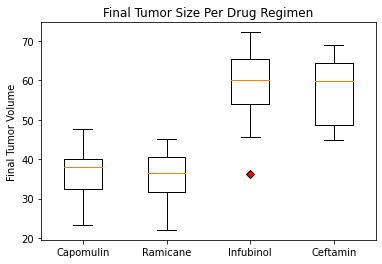

In [27]:
# Plot boxplots
# Refit data from dataframes into 2D array
obsArray = [capdf["Final Tumor Volume"],ramdf["Final Tumor Volume"],infdf["Final Tumor Volume"],cefdf["Final Tumor Volume"]]

# Draw boxplot chart
fig2, ax2 = plt.subplots()

# Format boxplot chart
ax2.set_title('Final Tumor Size Per Drug Regimen')
ax2.set_ylabel('Final Tumor Volume')
red_diamond = dict(markerfacecolor='r', marker='D')
plt.xticks([],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]) 
ax2.boxplot(obsArray, flierprops = red_diamond)
plt.show()

     Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen  Weight (g)
242      g288          0           45.000000    Capomulin          19
474      g288          5           45.839400    Capomulin          19
523      g288         10           46.304003    Capomulin          19
727      g288         15           42.172301    Capomulin          19
1083     g288         20           42.957120    Capomulin          19
1246     g288         25           42.368692    Capomulin          19
1392     g288         30           42.874461    Capomulin          19
1540     g288         35           38.954115    Capomulin          19
1758     g288         40           36.356851    Capomulin          19
1777     g288         45           37.074024    Capomulin          19


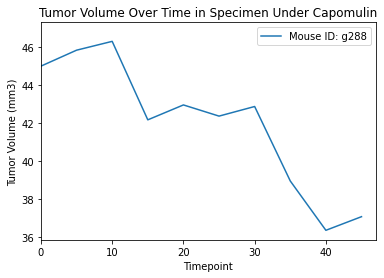

In [33]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point 
# for that mouse.
# Get a random mouse to sample under Capomulin regimen
sampleMousedf = mergeDataClean[mergeDataClean["Drug Regimen"] == "Capomulin"].sample(1)
sampleMouseID = sampleMousedf.iloc[0]["Mouse ID"]
capSingledf = mergeDataClean.loc[mergeDataClean["Mouse ID"] == sampleMouseID,:]
print(capSingledf[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]])

# Plot line graph for sample mouse
capSingleline, = plt.plot(capSingledf["Timepoint"], capSingledf["Tumor Volume (mm3)"], 
                          label=f'Mouse ID: {sampleMouseID}')
# Format line graph
plt.title("Tumor Volume Over Time in Specimen Under Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, max(capSingledf["Timepoint"]) + 2)
plt.ylim(min(capSingledf["Tumor Volume (mm3)"]) - 0.5 , max(capSingledf["Tumor Volume (mm3)"]) + 1)
plt.legend(handles=[capSingleline], loc="best")
plt.show()


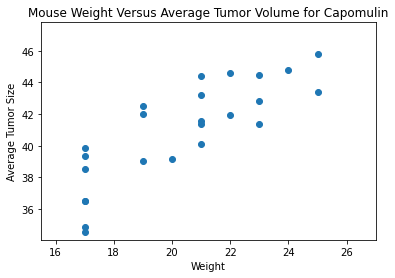

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
capAlldf = mergeDataClean.loc[mergeDataClean["Drug Regimen"] == "Capomulin",:]
# Find average tumor volume per mouse
capAllGrouped = capAlldf.groupby("Mouse ID")
capAvgVol = capAllGrouped["Tumor Volume (mm3)"].mean()
capWeight = capAllGrouped["Weight (g)"].unique().astype(int)
# Plot scatter chart
plt.scatter(capWeight,capAvgVol)
# Format scatter chart
plt.title("Mouse Weight Versus Average Tumor Volume for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size")
plt.xlim(min(capWeight) + 0.5, max(capWeight) + 2)
plt.ylim(min(capAvgVol) - 0.5 , max(capAvgVol) + 2)
plt.show()

The correlation between Mouse Weight and Average Tumor Volume for Capomulin is: 0.84.


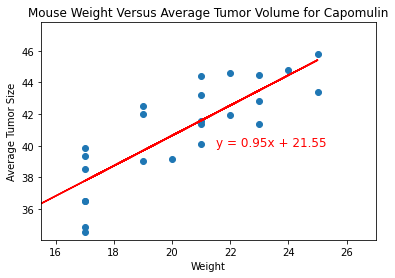

In [30]:
# Calculate the correlation coefficient and linear regression model between mouse weight and 
# average tumor volume for the Capomulin treatment. Plot the linear regression model on top of 
# the previous scatter plot.
# Calculating correlation coefficient
correlation = st.pearsonr(capWeight,capAvgVol)
print(f'The correlation between Mouse Weight and Average Tumor Volume for \
Capomulin is: {round(correlation[0],2)}.')

# Prepare objects for drawing
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capWeight, capAvgVol)
regress_values = capWeight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter chart
plt.scatter(capWeight,capAvgVol)
# Draw regression line and equation notation
plt.plot(capWeight,regress_values,"r-")
plt.annotate(line_eq,(21.5,40),fontsize=12,color="red")
# Format scatter chart
plt.title("Mouse Weight Versus Average Tumor Volume for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size")
plt.xlim(min(capWeight) + 0.5, max(capWeight) + 2)
plt.ylim(min(capAvgVol) - 0.5 , max(capAvgVol) + 2)
plt.show()
